In [ ]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
Tech_US =['MSFT', 'NFLX', 'FB', 'AMZN']   # 마이크로소프트 , 넷플릭스, 페이스북, 아마존 
Tech_KR =['005930.KS','000660.KS','035420.KS', '035720.KS' ] #삼성, SK하이닉스, 네이버, 카카오   

In [5]:
yf.Ticker('MSFT').history(start='2018-04-01', end='2020-03-31')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-02,86.399211,86.790759,83.572400,84.536949,48515400,0.0,0
2018-04-03,85.549276,85.998129,83.935316,85.673424,37213800,0.0,0
2018-04-04,83.897108,88.586182,83.782512,88.175529,35560000,0.0,0
2018-04-05,88.280572,88.882222,87.287367,88.223267,29771900,0.0,0
2018-04-06,87.373321,88.299676,85.453768,86.170021,38026000,0.0,0
...,...,...,...,...,...,...,...
2020-03-24,141.446004,147.202247,139.005757,145.962433,82516700,0.0,0
2020-03-25,146.523296,151.856423,142.124939,144.565186,75638200,0.0,0
2020-03-26,146.021477,154.149098,145.991959,153.607910,64568100,0.0,0


In [6]:
# price, dividends를 가져오는 함수를 정의
def get_price(companies):
  df=pd.DataFrame()
  for company in companies:
    df[company]=yf.Ticker(company).history(start='2018-04-01', end='2020-03-31')['Close']
  return df

def get_div(companies):
  df=pd.DataFrame()
  for company in companies:
    df[company]=yf.Ticker(company).history(start='2018-04-01', end='2020-03-31')['Dividends']
  return df

#US, KR 테크 기업의 주식 가격 
p_US=get_price(Tech_US)
p_KR=get_price(Tech_KR)
p_KR.columns=['SS', 'SKH', 'NVR', 'KKO']
#US, KR 테크기업의 배당금
d_US= get_div(Tech_US)
d_KR= get_div(Tech_KR)

In [7]:
d_KR.columns=['SS', 'SKH', 'NVR', 'KKO']
d_KR.sum()

SS     2832.0
SKH    2500.0
NVR     690.0
KKO      50.8
dtype: float64

<AxesSubplot:xlabel='Date'>

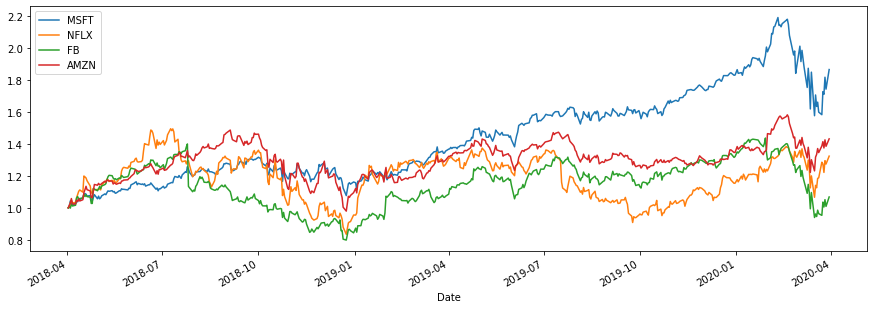

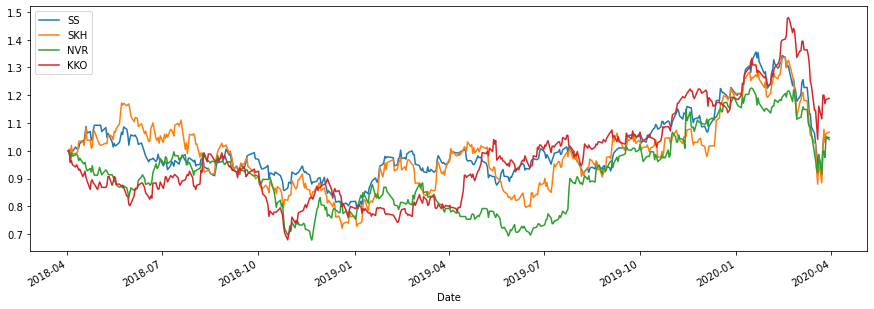

In [8]:
# plotting
(p_US/p_US.iloc[0]).plot(figsize=(15,5))
(p_KR/p_KR.iloc[0]).plot(figsize=(15,5))